In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import pack_vis_sol
import pack_dynamics
import copy
import time
import pack_ga
import pack_io
from IPython.display import HTML, display, clear_output
kgs.set_float32(False)
kgs.TREE_EXPANSION = kgs.TREE_EXPANSION**2
print(kgs.TREE_EXPANSION)
kgs.initialize_tree_globals()


local
stop final relax at some point
9.999999998354667e-11


In [2]:
sol = kgs.dill_load(kgs.temp_dir+'to_legalize.pickle')
sol.xyt = sol.xyt.astype(kgs.dtype_cp)
sol.h = sol.h.astype(kgs.dtype_cp)
print(sol.h)
#pack_vis_sol.pack_vis_sol(sol)
pack_io.solution_list_to_dataframe([sol]);

[[1.94092441e+00 1.48800100e-04 4.41957964e-04]]
Score of generated dataframe: 0.37670635825055987


In [3]:
# def legalize(sol, do_plot=False, move_factor=10., tolerance_rel_change=1e-7, stop_on_cost_increase = False, n_iter=20, target=1e-10):
#     solx = copy.deepcopy(sol)
#     solx.use_fixed_h = False
#     solx.snap()
#     import pack_ga
#     ga = pack_ga.GA()
#     cost = copy.deepcopy(ga.fitness_cost)
#     #cost.costs[0].scaling*=0.1
#     cost_overlap = copy.deepcopy(cost)
#     cost_overlap.costs.pop(0)
#     optimizer = pack_dynamics.OptimizerBFGS()
#     optimizer.cost = copy.deepcopy(cost)
#     optimizer.n_iterations = 2000
#     optimizer.max_step = 1e100
#     optimizer.history_size = 10
#     optimizer.tolerance_rel_change = tolerance_rel_change
#     optimizer.track_cost = do_plot
#     optimizer.plot_cost = do_plot
#     optimizer.use_line_search = True
#     optimizer.stop_on_cost_increase = stop_on_cost_increase
#     print("Before optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])
#     for _ in range(n_iter):
#         optimizer.cost.costs[0].scaling*=0.5
#         optimizer.max_step*=0.5
#         solx = optimizer.run_simulation(solx)
#         optimizer.n_iterations = np.round(200*move_factor).astype(int)
#         print("After optimization: ", cost.compute_cost_allocate(solx)[0].get().item(), cost_overlap.compute_cost_allocate(solx)[0].get().item(), solx.h[0,0])
#         if cost_overlap.compute_cost_allocate(solx)[0].get().item()<target:
#             break   
#     return solx
# solx = legalize(sol, target=1e-20, n_iter=40, tolerance_rel_change=0., do_plot = True, move_factor=100.)
# pack_io.solution_list_to_dataframe([solx]);

In [4]:
np.sqrt(0.37665600766412516*10)

np.float64(1.9407627564030725)

init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 144 bytes gmem, 2324 bytes cmem[3], 8 bytes cmem[4]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    96 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 38 registers, 96 bytes cumulative stack size, 404 bytes cmem[0], 120 bytes cmem[2]
ptxas info    : Function properties for __internal_trig_reduction_slowpathd
    0 bytes stack frame, 0 

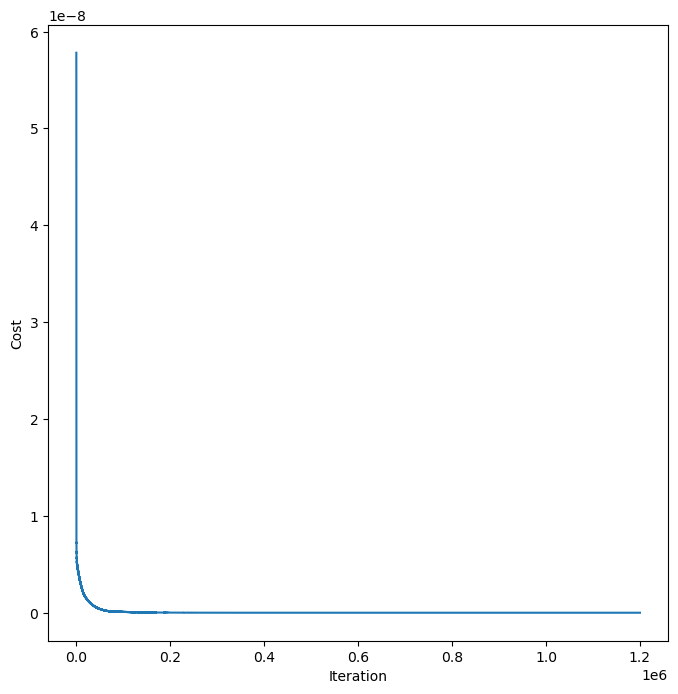

4.614643205924847e-20
Score of generated dataframe: 0.3766300575810439


In [5]:
solxx = copy.deepcopy(sol)
solxx.use_fixed_h = True
solxx.h[0,0] = 1.9406959 # good: 1.9406959, bad: 1.9406950
import pack_ga
ga = pack_ga.GA()
cost = copy.deepcopy(ga.fitness_cost)
cost.costs.pop(0)
#cost.scaling = 1e10
print(cost.compute_cost_allocate(solxx)[0].get().item())

# optimizer = pack_dynamics.OptimizerBFGS()
# optimizer.cost = copy.deepcopy(cost)
# optimizer.n_iterations = 200
# optimizer.max_step = None
# optimizer.history_size = 1
# optimizer.tolerance_rel_change = 0.
# optimizer.track_cost = True
# optimizer.plot_cost = True
# optimizer.use_line_search = True
# optimizer.stop_on_cost_increase = False

optimizer = pack_dynamics.Optimizer()
optimizer.cost = copy.deepcopy(cost)
optimizer.track_cost = True
optimizer.plot_cost = True
optimizer.n_iterations*=1000
for _ in range(1):    
    solxx = optimizer.run_simulation(solxx)
    optimizer.dt /= 2
    print(cost.compute_cost_allocate(solxx)[0].get().item())    
    pack_io.solution_list_to_dataframe([solxx])
    


In [6]:
pack_io.solution_list_to_dataframe([solxx])

Score of generated dataframe: 0.3766300575810439


,id,x,y,deg
0,010_0,s0.28934609079045037,s-0.20272889039573883,s-1279.5783881440943
1,010_1,s0.6253449241940139,s0.1533459946010506,s-1954.4410329072516
2,010_2,s-0.21540522014107422,s0.6487532559122626,s-1733.7374264344533
3,010_3,s0.7413382584517721,s-0.6492509246654332,s-966.3706222626306
4,010_4,s-0.6492264148831144,s-0.23711918572175578,s-1283.6542134568142
5,010_5,s0.28525660753054793,s0.2322663285866946,s-2137.3916905549813
6,010_6,s0.7569195018214898,s0.6449070877186645,s-1731.3940390746286
7,010_7,s-0.6416222683596039,s0.18776277916592773,s-2139.8495167887168
8,010_8,s-0.31318950660959133,s-0.16596222084557188,s-23.653892103436245
9,010_9,s-0.15739236051142616,s-0.6146404152277518,s-1328.5994330663016


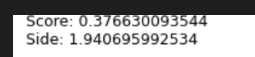